Some references about this topic

[Abdel Pérez-Lorenzana, Merced Montesinos, Tonatiuh Matos, Unification of Cosmological Scalar Fields, (2008)](https://arxiv.org/abs/0707.1678)

[Zong-Kuan Guo, Yun-Song Piao, Xinmin Zhang, Yuan-Zhong Zhang, Cosmological Evolution of a Quintom Model of Dark , (2004)](https://arxiv.org/abs/astro-ph/0410654)

Consider complex scalar field with the form $\xi = \frac{1}{\sqrt{2}}(\phi + i\psi)$. The kinetic part of the Lagrangian is:

$\mathcal{L} = \frac12 \partial_{\mu} \Phi^T \cdot \sigma_3 \cdot \partial^{\mu} \Phi = \frac12 [\partial_{\mu}\xi \partial^{\mu}\xi + \partial_{\mu}\xi^{\ast} \partial^{\mu}\xi^{\ast}] = \frac12 [\partial_{\mu}\phi \partial^{\mu}\phi - \partial_{\mu}\psi \partial^{\mu}\psi]$,

where $\Phi = \left(\begin{array}{c} \phi \\ \psi \end{array}\right)$ and $\sigma_3 = \left(\begin{array}{cc} 0 & 1\\ -1 & 0 \end{array}\right)$. 

We may use the three non-zero invariants to build the potential

$\Phi^T \sigma_3 \Phi = \phi^2 - \psi^2$

$\Phi^{\dagger}\Phi = \phi^2 + \psi^2$

$\Phi^{\dagger} \sigma_1 \Phi = 2\phi \psi$

In a flat FLRW universe the Friedmann equations are (neglecting the $\Lambda$ term):

$H^2 = \frac{\kappa^2}{3} \sum \rho, \quad \dot{H} = - \frac{\kappa^2}{2} \sum (\rho + p)$,

where $\kappa^2 = 8 \pi G$. With this the equations of motion of the model are:

$H^2 = \frac{\kappa^2}{3}\left[\rho_m + \frac12\dot{\phi}^2 - \frac12\dot{\psi}^2 + V(\phi^2, \psi^2, \phi \psi) \right], \quad \dot{H} = - \frac{\kappa^2}{2} \left[(1+\omega_m)\rho_m + (\dot{\phi}^2 - \dot{\psi}^2) \right]$,

$\ddot{\phi} + 3H\dot{\phi} + \frac{\partial V}{\partial \phi} = 0, \quad \ddot{\psi} + 3H\dot{\psi} - \frac{\partial V}{\partial \psi} = 0$.

## the model

Assuming that for matter and radiation $\rho_{mat} = \rho_{mat}^{(0)}a^{-3}, \quad \rho_{rad} = \rho_{rad}^{(0)}a^{-4}$; and potential $V = \frac{m_1^2 \phi^2}{2} +m_1 m_2 \phi \psi +\frac{m_2^2 \psi^2}{2} = \frac12 (m_1 \phi + m_2 \psi)^2$ then:

$\frac{H}{H_0} \equiv  h = \left[\frac{\kappa^2 \dot{\phi}^2 }{6 H_0^2} - \frac{\kappa^2 \dot{\psi}^2}{6 H_0^2} + \frac{\kappa^2 m_1^2 \phi^2}{6 H_0^2} + \frac{\kappa^2 m_2^2 \psi^2}{6 H_0^2} + \frac{\kappa^2 m_1 m_2 \phi \psi}{3 H_0^2} + \Omega_{mat}^{(0)}a^{-3} + \Omega_{rad}^{(0)}a^{-4}\right]^{1/2}$

defining:

$x \equiv \frac{\kappa}{\sqrt{6} H_0} \dot{\phi}, \quad 
y \equiv \frac{\kappa}{\sqrt{6} H_0} \dot{\psi}, \quad 
u \equiv \frac{\kappa m_1}{\sqrt{6} H_0}\phi, \quad 
v \equiv \frac{\kappa m_1}{\sqrt{6} H_0}\psi$.

$\Rightarrow \quad h = \left[x^2 - y^2 + (u+v)^2 + \Omega_{mat}^{(0)}a^{-3} + \Omega_{rad}^{(0)}a^{-4} \right]^{1/2}$

the ODE system is:

$x' = -3x - \frac{m_1 (u+v)}{H_0 h}$,

$y' = -3y + \frac{m_2 (u+v)}{H_0 h}$,

$u' = \frac{m_1 x}{H_0 h}$,

$v' = \frac{m_2 y}{H_0 h}$.

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
import numpy as np
%matplotlib inline

In [2]:
# intervalo 
lna = np.linspace(-15, 0, 300)
a = np.exp(lna)
H0 = 0.70
Om0 = 0.3
Or0 = 0.0001

In [3]:
def hub(lna, x_vec):
    a=np.exp(lna)
    x, y, u, v  = x_vec
    return np.sqrt(x**2 -y**2 +(u+v)**2 +Om0/a**3 +Or0/a**4)

def RHS(x_vec, lna, m1, m2):
    x, y, u, v = x_vec
    return [-3*x - (m1*(u+v))/(H0*hub(lna,x_vec)),
            -3*y + (m2*(u+v))/(H0*hub(lna,x_vec)),
             (m1*x)/(H0*hub(lna,x_vec)),
             (m2*y)/(H0*hub(lna,x_vec))]

def solver(m1, m2, x0, y0, u0, v0):
    cond_ini = [x0, y0, u0, v0]
    y_result = odeint(RHS, cond_ini, lna, args=(m1,m2))
    return y_result

In [4]:
def cond_ini_potencial(m1, m2, low, high, tol, steps):
    dif = 1
    count=0
                                        
    if True:
        while (abs(dif)>tol):
            pot0 = (low + high)/2.0
            sol = solver(m1, m2, 0.0, 1.0, pot0, pot0)
            xx, yy, uu, vv = sol.T
            
            # Omega Lambda hoy
            Omegal=  (xx[-1]**2 -yy[-1]**2 +(uu[-1]+vv[-1])**2)/hub(0.0, [xx[-1],yy[-1],uu[-1],vv[-1]])**2 
            dif = Omegal - 0.7
            #print 'Omega_L=', Omegal,',', 'dif=', dif,',', 'u0=', pot0
            if(abs(dif) < tol):
                break
            else:
                if(dif<0):
                    low = pot0
                else:
                    high = pot0
            count+=1
            if (count > steps):
                print 'No se encontro la condición inicial'
                break 
    return pot0               

m1= 2 , m2= 1 , Omega_Lambda= 0.699998026855 , potencial inicial = 0.720920562744


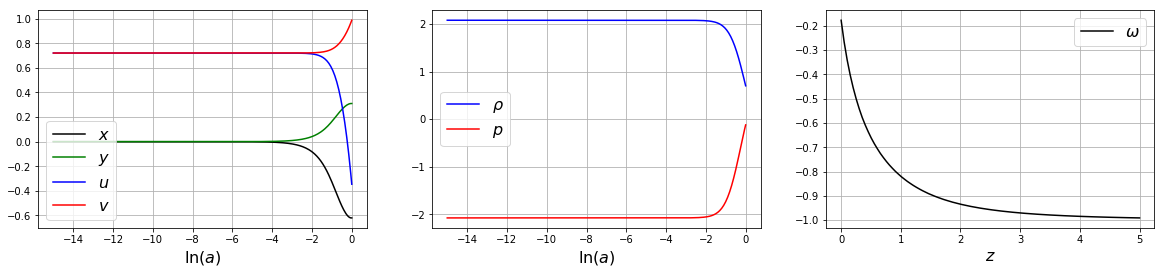

In [7]:
z = np.exp(-lna)-1.
zvals = np.linspace(0.001, 5, 100)

m1_0 = 2
m2_0 = 1
pot_ini_0 = cond_ini_potencial(m1_0, m2_0, 0.0, 5.0, 0.00001, 50)
x0, y0, u0, v0= solver(m1_0, m2_0, 0, 0, pot_ini_0, pot_ini_0).T
Om_de_0 =  (x0[-1]**2 - y0[-1]**2 + (u0[-1]+v0[-1])**2)/hub(0.0, [x0[-1],y0[-1],u0[-1],v0[-1]])**2 
print  'm1=', m1_0, ',', 'm2=', m2_0, ',', 'Omega_Lambda=', Om_de_0, ',', 'potencial inicial =', pot_ini_0

rho_00 = x0**2 - y0**2 + (u0+v0)**2
p_00   = x0**2 - y0**2 - (u0+v0)**2
omega_0 = p_00/rho_00
omega_de_0 = np.interp(zvals, z[::-1], omega_0[::-1])
rho_0 = np.interp(zvals, z[::-1], rho_00[::-1])
p_0 = np.interp(zvals, z[::-1], p_00[::-1])

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(lna, x0, 'k', label='$x$')
ax1.plot(lna, y0, 'g', label='$y$')
ax1.plot(lna, u0, 'b', label='$u$')
ax1.plot(lna, v0, 'r', label='$v$')
ax1.legend(loc='lower left', fontsize = 16)
ax1.set_xlabel('$\ln(a)$', fontsize = 16)
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(lna, rho_00, 'b', label=r'$\rho$')
ax2.plot(lna, p_00,   'r', label=r'$p$')
ax2.legend(loc='best', fontsize = 16)
ax2.set_xlabel('$\ln(a)$', fontsize = 16)
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(zvals, omega_de_0, 'k', label=r'$\omega$')
ax3.legend(loc='best', fontsize = 16)
ax3.set_xlabel('$z$', fontsize = 16)
ax3.grid(True)

#plt.savefig('interaction_2.png')
plt.show()

In [18]:
m1_1 = 0.5
m2_1 = 0.5

m1_2 = 1.0
m2_2 = 0.5

m1_3 = 1.5
m2_3 = 0.5

m1_4 = 2.0
m2_4 = 0.5

m1_5 = 2.5
m2_5 = 0.5

pot_ini_1 = cond_ini_potencial(m1_1, m2_1, 0.0, 1.0, 0.00001, 30)
x1, y1, u1, v1= solver(m1_1, m2_1, 0, 0, pot_ini_1, pot_ini_1).T
Om_de_1 =  (x1[-1]**2 - y1[-1]**2 + (u1[-1]+v1[-1])**2)/hub(0.0, [x1[-1],y1[-1],u1[-1],v1[-1]])**2 
print  'caso 1: m1=', m1_1, ',', 'm2=', m2_1, ',', 'Omega_Lambda=', Om_de_1, ',', 'potencial inicial =', pot_ini_1

pot_ini_2 = cond_ini_potencial(m1_2, m2_2, 0.0, 1.0, 0.00001, 30)
x2, y2, u2, v2 = solver(m1_2, m2_2, 0, 0, pot_ini_2, pot_ini_2).T
Om_de_2 =  (x2[-1]**2 - y2[-1]**2 + (u2[-1]+v2[-1])**2)/hub(0.0, [x2[-1],y2[-1],u2[-1],v2[-1]])**2 
print  'caso 2: m1=', m1_2, ',', 'm2=', m2_2, ',', 'Omega_Lambda=', Om_de_2, ',', 'potencial inicial =', pot_ini_2

pot_ini_3 = cond_ini_potencial(m1_3, m2_3, 0.0, 1.0, 0.00001, 30)
x3, y3, u3, v3 = solver(m1_3, m2_3, 0, 0, pot_ini_3, pot_ini_3).T
Om_de_3 =  (x3[-1]**2 - y3[-1]**2 + (u3[-1]+v3[-1])**2)/hub(0.0, [x3[-1],y3[-1],u3[-1],v3[-1]])**2 
print  'caso 3: m1=', m1_3, ',', 'm2=', m2_3, ',', 'Omega_Lambda=', Om_de_3, ',', 'potencial inicial =', pot_ini_3

pot_ini_4 = cond_ini_potencial(m1_4, m2_4, 0.0, 1.0, 0.00001, 30)
x4, y4, u4, v4 = solver(m1_4, m2_4, 0, 0, pot_ini_4, pot_ini_4).T
Om_de_4 =  (x4[-1]**2 - y4[-1]**2 + (u4[-1]+v4[-1])**2)/hub(0.0, [x4[-1],y4[-1],u4[-1],v4[-1]])**2 
print  'caso 4: m1=', m1_4, ',', 'm2=', m2_4, ',', 'Omega_Lambda=', Om_de_4, ',', 'potencial inicial =', pot_ini_4

pot_ini_5 = cond_ini_potencial(m1_5, m2_5, 0.0, 1.5, 0.00001, 50)
x5, y5, u5, v5 = solver(m1_5, m2_5, 0, 0, pot_ini_5, pot_ini_5).T
Om_de_5 =  (x5[-1]**2 - y5[-1]**2 + (u5[-1]+v5[-1])**2)/hub(0.0, [x5[-1],y5[-1],u5[-1],v5[-1]])**2 
print  'caso 5: m1=', m1_5, ',', 'm2=', m2_5, ',', 'Omega_Lambda=', Om_de_5, ',', 'potencial inicial =', pot_ini_5

caso 1: m1= 0.5 , m2= 0.5 , Omega_Lambda= 0.699996252659 , potencial inicial = 0.418395996094
caso 2: m1= 1.0 , m2= 0.5 , Omega_Lambda= 0.700001283148 , potencial inicial = 0.488616943359
caso 3: m1= 1.5 , m2= 0.5 , Omega_Lambda= 0.700004133235 , potencial inicial = 0.615142822266
caso 4: m1= 2.0 , m2= 0.5 , Omega_Lambda= 0.700000164952 , potencial inicial = 0.801055908203
caso 5: m1= 2.5 , m2= 0.5 , Omega_Lambda= 0.700005040509 , potencial inicial = 1.03795623779


In [19]:
z = np.exp(-lna)-1.
zvals = np.linspace(0.001, 5, 100)

omega_1 = (x1**2 - y1**2 - (u1+v1)**2)/(x1**2 - y1**2 + (u1+v1)**2)
omega_de_1 = np.interp(zvals, z[::-1], omega_1[::-1])

omega_2 = (x2**2 - y2**2 - (u2+v2)**2)/(x2**2 - y2**2 + (u2+v2)**2)
omega_de_2 = np.interp(zvals, z[::-1], omega_2[::-1])

omega_3 = (x3**2 - y3**2 - (u3+v3)**2)/(x3**2 - y3**2 + (u3+v3)**2)
omega_de_3 = np.interp(zvals, z[::-1], omega_3[::-1])

omega_4 = (x4**2 - y4**2 - (u4+v4)**2)/(x4**2 - y4**2 + (u4+v4)**2)
omega_de_4 = np.interp(zvals, z[::-1], omega_4[::-1])

omega_5 = (x5**2 - y5**2 - (u5+v5)**2)/(x5**2 - y5**2 + (u5+v5)**2)
omega_de_5 = np.interp(zvals, z[::-1], omega_5[::-1])

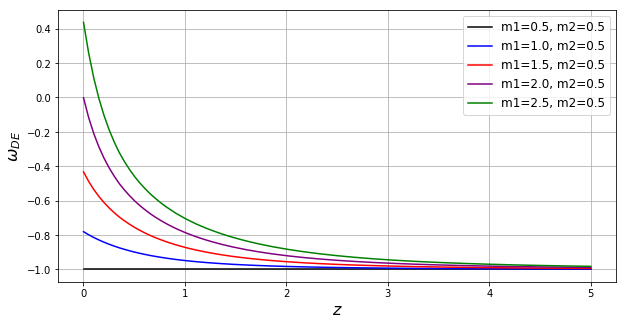

In [21]:
plt.figure(figsize=(10,5))

plt.plot(zvals, omega_de_1, 'black',  label='m1=0.5, m2=0.5')
plt.plot(zvals, omega_de_2, 'blue',   label='m1=1.0, m2=0.5')
plt.plot(zvals, omega_de_3, 'red',    label='m1=1.5, m2=0.5')
plt.plot(zvals, omega_de_4, 'purple', label='m1=2.0, m2=0.5')
plt.plot(zvals, omega_de_5, 'green',  label='m1=2.5, m2=0.5')

plt.legend(loc='best', fontsize = 12)
plt.xlabel('$z$', fontsize = 16)
plt.ylabel('$\omega_{DE}$', fontsize = 16)
plt.grid(True)
#plt.savefig('interaction_2.png')
plt.show()

In [22]:
h1 = hub(lna, [x1,y1,u1,v1])
Ode_1 =  (x1**2 - y1**2 + (u1+v1)**2)/h1**2 
Omat_1 = Om0/((a**3)*(h1**2))
Orad_1 = Or0/((a**4)*(h1**2))

h2 = hub(lna, [x2,y2,u2,v2])
Ode_2 =  (x2**2 - y2**2 + (u2+v2)**2)/h2**2 
Omat_2 = Om0/((a**3)*(h2**2))
Orad_2 = Or0/((a**4)*(h2**2))

h3 = hub(lna, [x3,y3,u3,v3])
Ode_3 =  (x3**2 - y3**2 + (u3+v3)**2)/h3**2 
Omat_3 = Om0/((a**3)*(h3**2))
Orad_3 = Or0/((a**4)*(h3**2))

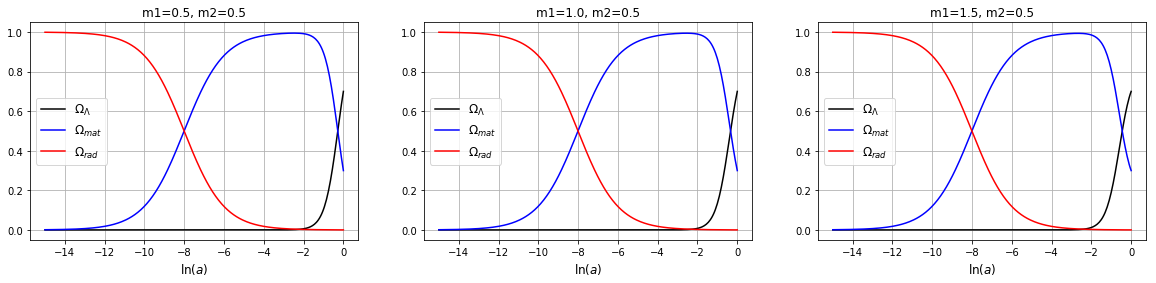

In [23]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(lna, Ode_1, 'k', label=r'$\Omega_{\Lambda}$')
ax1.plot(lna, Omat_1, 'b', label=r'$\Omega_{mat}$')
ax1.plot(lna, Orad_1, 'r', label=r'$\Omega_{rad}$')
ax1.set_title('m1=0.5, m2=0.5', fontsize = 12)
ax1.legend(loc='best', fontsize = 12)
ax1.set_xlabel('$\ln(a)$', fontsize = 12)
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(lna, Ode_2, 'k', label=r'$\Omega_{\Lambda}$')
ax2.plot(lna, Omat_2, 'b', label=r'$\Omega_{mat}$')
ax2.plot(lna, Orad_2, 'r', label=r'$\Omega_{rad}$')
ax2.set_title('m1=1.0, m2=0.5', fontsize = 12)
ax2.legend(loc='best', fontsize = 12)
ax2.set_xlabel('$\ln(a)$', fontsize = 12)
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(lna, Ode_3, 'k', label=r'$\Omega_{\Lambda}$')
ax3.plot(lna, Omat_3, 'b', label=r'$\Omega_{mat}$')
ax3.plot(lna, Orad_3, 'r', label=r'$\Omega_{rad}$')
ax3.set_title('m1=1.5, m2=0.5', fontsize = 12)
ax3.legend(loc='best', fontsize = 12)
ax3.set_xlabel('$\ln(a)$', fontsize = 12)
ax3.grid(True)

plt.show()